In [1]:

## !pip install mlxtend


In [2]:

import numpy as np
import torch
import pandas as pd
import sklearn
import random

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


In [3]:

import matplotlib.pyplot as plt

from mlxtend.plotting import heatmap
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader


In [4]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score


In [5]:

batch_size    = 16
learning_rate = 0.003 ## 0.001
N_Epochs      = 4000

epsilon = 0.0001


In [6]:

path_data = 'iris.csv'

iris_raw_data = pd.read_csv( path_data, delimiter="," )


In [7]:

iris_raw_data


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [8]:

iris_raw_data.species = iris_raw_data.species.map( {'setosa':0 , 'virginica':1, 'versicolor':2} )


In [9]:

iris_raw_data


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


In [10]:

headers_list = iris_raw_data.columns.values.tolist()

headers_list


['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

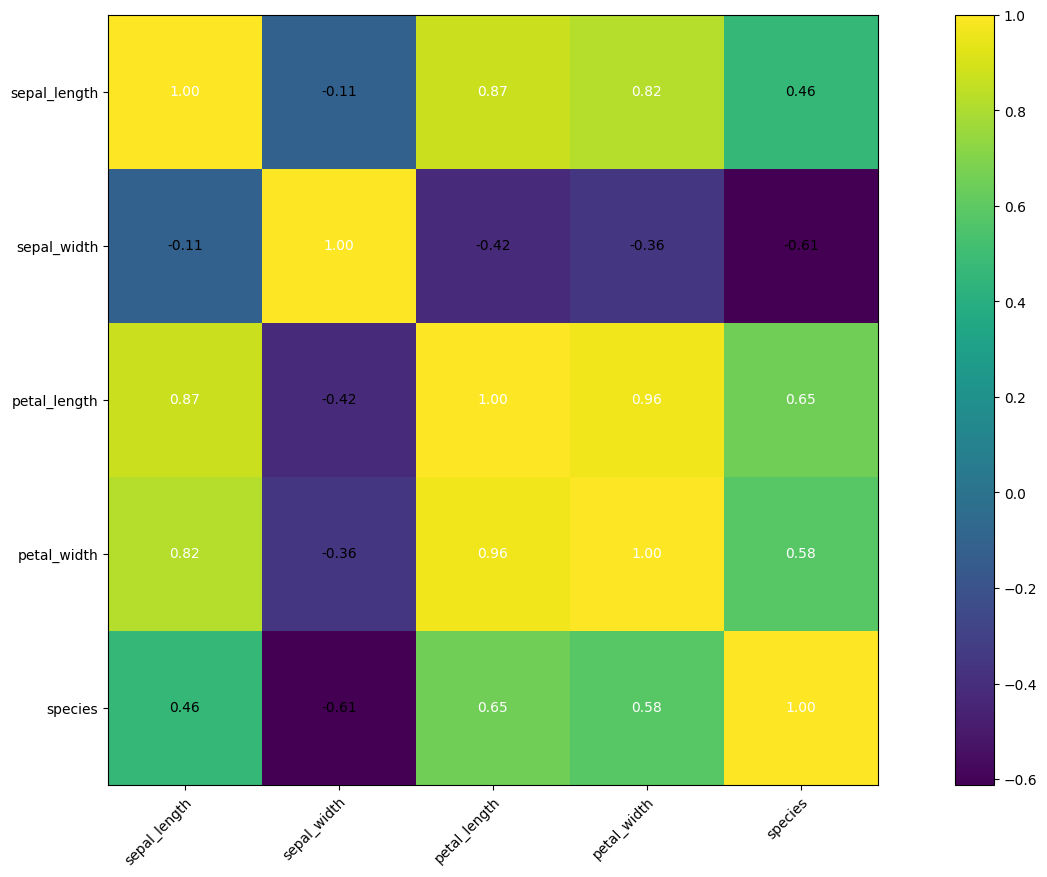

In [11]:

cm = np.corrcoef(   iris_raw_data[headers_list].values.T   )
hm = heatmap(cm, row_names=headers_list, column_names=headers_list, figsize=(20,10))
plt.show()


In [12]:

## Convert Pandas to Numpy

iris_raw_data_np = iris_raw_data.to_numpy()


In [13]:

iris_raw_data_np


array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ],
       [5.4, 3.9, 1.7, 0.4, 0. ],
       [4.6, 3.4, 1.4, 0.3, 0. ],
       [5. , 3.4, 1.5, 0.2, 0. ],
       [4.4, 2.9, 1.4, 0.2, 0. ],
       [4.9, 3.1, 1.5, 0.1, 0. ],
       [5.4, 3.7, 1.5, 0.2, 0. ],
       [4.8, 3.4, 1.6, 0.2, 0. ],
       [4.8, 3. , 1.4, 0.1, 0. ],
       [4.3, 3. , 1.1, 0.1, 0. ],
       [5.8, 4. , 1.2, 0.2, 0. ],
       [5.7, 4.4, 1.5, 0.4, 0. ],
       [5.4, 3.9, 1.3, 0.4, 0. ],
       [5.1, 3.5, 1.4, 0.3, 0. ],
       [5.7, 3.8, 1.7, 0.3, 0. ],
       [5.1, 3.8, 1.5, 0.3, 0. ],
       [5.4, 3.4, 1.7, 0.2, 0. ],
       [5.1, 3.7, 1.5, 0.4, 0. ],
       [4.6, 3.6, 1. , 0.2, 0. ],
       [5.1, 3.3, 1.7, 0.5, 0. ],
       [4.8, 3.4, 1.9, 0.2, 0. ],
       [5. , 3. , 1.6, 0.2, 0. ],
       [5. , 3.4, 1.6, 0.4, 0. ],
       [5.2, 3.5, 1.5, 0.2, 0. ],
       [5.2, 3.4, 1.4, 0.2, 0. ],
       [4.7, 3

In [14]:

iris_raw_data_np.shape


(150, 5)

In [15]:

X = iris_raw_data_np[:, :-1]


y = iris_raw_data_np[:, 4:5]


In [16]:

y


array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],

In [17]:

y = y.astype(int)


In [18]:

y


array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
    

In [19]:

the_set = np.unique(y)

the_set


array([0, 1, 2])

In [20]:

len(  the_set  )


3

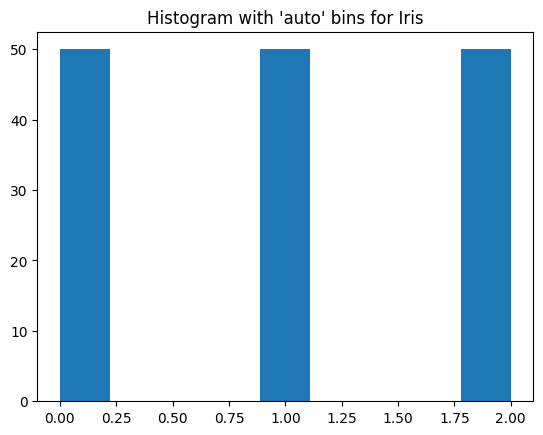

In [21]:

_ = plt.hist(y, bins='auto') 

plt.title("Histogram with 'auto' bins for Iris")

plt.show()


In [22]:

print(X.shape)

print(y.shape)


(150, 4)
(150, 1)


In [23]:

random_seed = int( random.random() * 100 )     ## 42


In [24]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)


In [25]:

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(120, 4)
(30, 4)
(120, 1)
(30, 1)


In [26]:

X_test.dtype 


dtype('float64')

In [27]:

y_test.dtype


dtype('int32')

In [28]:

X_train = X_train.astype(  np.float32  )
X_test  = X_test.astype(   np.float32  )
y_train = y_train.astype(  np.int64 )       ## np.long  
y_test  = y_test.astype(   np.int64 )


In [29]:

X_test.dtype 


dtype('float32')

In [30]:

X_train_tr = torch.from_numpy(X_train)
X_test_tr  = torch.from_numpy(X_test)
y_train_tr = torch.from_numpy(y_train)
y_test_tr  = torch.from_numpy(y_test)



## Standardization


In [31]:

x_means      = X_train_tr.mean(0, keepdim=True ) 

x_deviations = X_train_tr.std( 0, keepdim=True) + epsilon


In [32]:

x_means


tensor([[5.8525, 3.0500, 3.8008, 1.2083]])

In [33]:

x_means.shape


torch.Size([1, 4])

In [34]:

x_deviations


tensor([[0.8188, 0.4483, 1.7524, 0.7643]])

In [35]:

x_deviations.shape


torch.Size([1, 4])

In [36]:

X_train_tr_scaled = (X_train_tr - x_means) / x_deviations


In [37]:

X_train_tr_scaled.shape


torch.Size([120, 4])

In [39]:

X_train_tr


tensor([[5.1000, 3.5000, 1.4000, 0.3000],
        [5.5000, 2.4000, 3.7000, 1.0000],
        [6.3000, 2.9000, 5.6000, 1.8000],
        [5.5000, 4.2000, 1.4000, 0.2000],
        [5.8000, 2.7000, 5.1000, 1.9000],
        [5.7000, 4.4000, 1.5000, 0.4000],
        [5.6000, 2.9000, 3.6000, 1.3000],
        [5.5000, 2.4000, 3.8000, 1.1000],
        [5.8000, 4.0000, 1.2000, 0.2000],
        [6.0000, 2.2000, 4.0000, 1.0000],
        [5.1000, 2.5000, 3.0000, 1.1000],
        [5.0000, 3.4000, 1.6000, 0.4000],
        [4.4000, 2.9000, 1.4000, 0.2000],
        [5.1000, 3.8000, 1.5000, 0.3000],
        [4.8000, 3.0000, 1.4000, 0.1000],
        [5.4000, 3.7000, 1.5000, 0.2000],
        [5.1000, 3.8000, 1.6000, 0.2000],
        [5.5000, 3.5000, 1.3000, 0.2000],
        [6.7000, 3.3000, 5.7000, 2.1000],
        [5.0000, 3.4000, 1.5000, 0.2000],
        [6.4000, 2.8000, 5.6000, 2.2000],
        [6.0000, 3.4000, 4.5000, 1.6000],
        [6.9000, 3.1000, 4.9000, 1.5000],
        [6.1000, 2.9000, 4.7000, 1

In [38]:

X_train_tr_scaled


tensor([[-9.1904e-01,  1.0039e+00, -1.3700e+00, -1.1885e+00],
        [-4.3052e-01, -1.4501e+00, -5.7541e-02, -2.7259e-01],
        [ 5.4654e-01, -3.3463e-01,  1.0267e+00,  7.7415e-01],
        [-4.3052e-01,  2.5655e+00, -1.3700e+00, -1.3193e+00],
        [-6.4119e-02, -7.8081e-01,  7.4137e-01,  9.0500e-01],
        [-1.8625e-01,  3.0117e+00, -1.3130e+00, -1.0576e+00],
        [-3.0838e-01, -3.3463e-01, -1.1461e-01,  1.1994e-01],
        [-4.3052e-01, -1.4501e+00, -4.7564e-04, -1.4175e-01],
        [-6.4119e-02,  2.1193e+00, -1.4842e+00, -1.3193e+00],
        [ 1.8014e-01, -1.8963e+00,  1.1365e-01, -2.7259e-01],
        [-9.1904e-01, -1.2270e+00, -4.5700e-01, -1.4175e-01],
        [-1.0412e+00,  7.8081e-01, -1.2559e+00, -1.0576e+00],
        [-1.7740e+00, -3.3463e-01, -1.3700e+00, -1.3193e+00],
        [-9.1904e-01,  1.6732e+00, -1.3130e+00, -1.1885e+00],
        [-1.2854e+00, -1.1154e-01, -1.3700e+00, -1.4502e+00],
        [-5.5265e-01,  1.4501e+00, -1.3130e+00, -1.3193e+00],
        


## Dataloader


In [40]:

X_train.shape[0]


120

In [41]:

iris_train_list = [  ( X_train_tr[i],  y_train_tr[i].item()  )  for i in range( X_train.shape[0] ) ]

iris_test_list  = [  ( X_test_tr[i],   y_test_tr[i].item()   )  for i in range( X_test.shape[0]  ) ]


In [42]:


iris_train_list[:3] 




[(tensor([5.1000, 3.5000, 1.4000, 0.3000]), 0),
 (tensor([5.5000, 2.4000, 3.7000, 1.0000]), 2),
 (tensor([6.3000, 2.9000, 5.6000, 1.8000]), 1)]

In [43]:

train_dl = torch.utils.data.DataLoader( iris_train_list, batch_size=batch_size, shuffle=True )


In [44]:

all_test_data = X_test.shape[0]

test_dl  = torch.utils.data.DataLoader(iris_test_list,  batch_size=all_test_data, shuffle=True)


In [45]:

train_dl




## Neural Network Architectures


In [47]:

## MLP

class MLP_Net(nn.Module):
    ## init the class
    def __init__(self, x_means, x_deviations):
        super().__init__()
        
        self.x_means      = x_means
        self.x_deviations = x_deviations
        
        self.linear1 = nn.Linear(4, 4)
        self.act1    = nn.Sigmoid()
        self.linear2 = nn.Linear(4, 3)
        self.act2    = nn.Softmax(dim=1)
        self.dropout = nn.Dropout(0.25)
        
        
    ## perform inference
    def forward(self,  x ):
        
        ## x      = (x - self.x_means) / self.x_deviations
        
        x      = self.linear1(x)
        x      = self.act1(x)
        ## x      = self.dropout(x)
        x      = self.linear2(x)
        y_pred = self.act2(x)
        
        return y_pred



## Training Loop


In [48]:

def training_loop( N_Epochs, model, loss_fn, opt  ):
    
    for epoch in range(N_Epochs):
        for xb, yb in train_dl:
            
            ## yb = torch.squeeze(yb, dim=1)
            
            y_pred = model(xb)
            ## print(    yb.shape   )
            ## print( y_pred.shape  )
            loss   = loss_fn(y_pred, yb)
            
            opt.zero_grad()
            loss.backward()
            opt.step()
            
        if epoch % 50 == 0:
            print(epoch, "loss=", loss)
            



## Core Functions for MLP


In [49]:

model      = MLP_Net( x_means, x_deviations  )

opt        = torch.optim.Adam(    model.parameters(), lr=learning_rate )

## the y_test data can be integers and does not need to be one hot encoded with this function
loss_fn    = nn.CrossEntropyLoss( )   

training_loop(  N_Epochs, model, loss_fn, opt  )


0 loss= tensor(1.0980, grad_fn=<NllLossBackward0>)
50 loss= tensor(0.9767, grad_fn=<NllLossBackward0>)
100 loss= tensor(0.7154, grad_fn=<NllLossBackward0>)
150 loss= tensor(0.6504, grad_fn=<NllLossBackward0>)
200 loss= tensor(0.6599, grad_fn=<NllLossBackward0>)
250 loss= tensor(0.6383, grad_fn=<NllLossBackward0>)
300 loss= tensor(0.6053, grad_fn=<NllLossBackward0>)
350 loss= tensor(0.5748, grad_fn=<NllLossBackward0>)
400 loss= tensor(0.5645, grad_fn=<NllLossBackward0>)
450 loss= tensor(0.6217, grad_fn=<NllLossBackward0>)
500 loss= tensor(0.6076, grad_fn=<NllLossBackward0>)
550 loss= tensor(0.5566, grad_fn=<NllLossBackward0>)
600 loss= tensor(0.6656, grad_fn=<NllLossBackward0>)
650 loss= tensor(0.5717, grad_fn=<NllLossBackward0>)
700 loss= tensor(0.5555, grad_fn=<NllLossBackward0>)
750 loss= tensor(0.5571, grad_fn=<NllLossBackward0>)
800 loss= tensor(0.5525, grad_fn=<NllLossBackward0>)
850 loss= tensor(0.6744, grad_fn=<NllLossBackward0>)
900 loss= tensor(0.6708, grad_fn=<NllLossBackward

In [51]:

def print_metrics_function(y_test, y_pred):
    print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
    confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
    print("Confusion Matrix:")
    print(confmat)
    print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred, average='weighted'))
    print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred, average='weighted'))
    print('F1-measure: %.3f' % f1_score(y_true=y_test, y_pred=y_pred, average='weighted'))


In [52]:

with torch.no_grad():
    for x_real, y_real in test_dl:
        ## batch_size = imgs.shape[0]
        y_pred = model(  x_real  )
        vals, indeces = torch.max( y_pred, dim=1  )
        preds = indeces
        print_metrics_function(y_real, preds)


Accuracy: 0.97
Confusion Matrix:
[[12  0  0]
 [ 0  9  0]
 [ 0  1  8]]
Precision: 0.970
Recall: 0.967
F1-measure: 0.967



## DL Net (Deep Neural Net)


In [53]:

## Deep Learning with 2 hidden layers

class DL_Net( nn.Module ):
    
    def __init__(self, x_means, x_deviations):
        super().__init__()
        
        self.x_means      = x_means
        self.x_deviations = x_deviations
        
        self.linear1 = nn.Linear(4, 15)
        self.act1    = nn.ReLU()
        self.linear2 = nn.Linear(15, 9)
        self.act2    = nn.ReLU()
        self.linear3 = nn.Linear(9, 3)
        self.act3    = nn.Softmax(dim=1)
        self.dropout = nn.Dropout(0.25)
        
    ## perform inference
    def forward(self, x):
        
        x      = (x - self.x_means) / self.x_deviations
        
        x      = self.linear1(x)
        x      = self.act1(x)
        x      = self.dropout(x)
        x      = self.linear2(x)
        x      = self.act2(x)
        x      = self.dropout(x)
        x      = self.linear3(x)
        y_pred = self.act3(x)
        
        return y_pred


In [54]:

model      = DL_Net( x_means, x_deviations  )

opt        = torch.optim.Adam(    model.parameters(), lr=learning_rate )

## the y_test data can be integers and does not need to be one hot encoded with this function
loss_fn    = nn.CrossEntropyLoss( )   

training_loop(  N_Epochs, model, loss_fn, opt  )


0 loss= tensor(1.0548, grad_fn=<NllLossBackward0>)
50 loss= tensor(0.6078, grad_fn=<NllLossBackward0>)
100 loss= tensor(0.5517, grad_fn=<NllLossBackward0>)
150 loss= tensor(0.5525, grad_fn=<NllLossBackward0>)
200 loss= tensor(0.5523, grad_fn=<NllLossBackward0>)
250 loss= tensor(0.5522, grad_fn=<NllLossBackward0>)
300 loss= tensor(0.5533, grad_fn=<NllLossBackward0>)
350 loss= tensor(0.5523, grad_fn=<NllLossBackward0>)
400 loss= tensor(0.5515, grad_fn=<NllLossBackward0>)
450 loss= tensor(0.5546, grad_fn=<NllLossBackward0>)
500 loss= tensor(0.5514, grad_fn=<NllLossBackward0>)
550 loss= tensor(0.5515, grad_fn=<NllLossBackward0>)
600 loss= tensor(0.5912, grad_fn=<NllLossBackward0>)
650 loss= tensor(0.5515, grad_fn=<NllLossBackward0>)
700 loss= tensor(0.5531, grad_fn=<NllLossBackward0>)
750 loss= tensor(0.5515, grad_fn=<NllLossBackward0>)
800 loss= tensor(0.5515, grad_fn=<NllLossBackward0>)
850 loss= tensor(0.6765, grad_fn=<NllLossBackward0>)
900 loss= tensor(0.5514, grad_fn=<NllLossBackward

In [55]:

with torch.no_grad():
    for x_real, y_real in test_dl:
        ## batch_size = imgs.shape[0]
        y_pred = model(  x_real  )
        vals, indeces = torch.max( y_pred, dim=1  )
        preds = indeces
        print_metrics_function(y_real, preds)


Accuracy: 0.93
Confusion Matrix:
[[12  0  0]
 [ 0  9  0]
 [ 0  2  7]]
Precision: 0.945
Recall: 0.933
F1-measure: 0.932
